# Jupyter adaptation of plot_convergence.py

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns 
import numpy as np

In [2]:
data = 'opt_output/tbCV_BO_MAE.csv'

df = pd.read_csv(data, index_col=[0])

df["Calls"] = df.index
df

,Dataset,MAE/MAD,Subject,Calls
0,dG(hydr),1.218345,absolute,0
1,dG(hydr),0.784018,absolute,1
2,dG(hydr),0.772866,absolute,2
3,dG(hydr),0.772866,absolute,3
4,dG(hydr),0.772866,absolute,4
...,...,...,...,...
35,dG(hydr),0.638606,absolute,35
36,dG(hydr),0.638606,absolute,36
37,dG(hydr),0.638606,absolute,37
38,dG(hydr),0.638606,absolute,38


In [3]:
noise_dataset = df.loc[df["Dataset"] == "Noise"]
noise_dataset["type"] = "control"

numerical_datasets = df.loc[df["Dataset"] != "Noise"]
#numerical_datasets = df
numerical_datasets = numerical_datasets.astype({"Dataset" : str})
numerical_datasets = numerical_datasets.sort_values("Dataset")
numerical_datasets = numerical_datasets.astype({"Dataset" : str})
numerical_datasets["type"] = "data"

df = pd.concat([noise_dataset, numerical_datasets])
#df = numerical_datasets
df = df.rename(index=str, columns={"Dataset":"Feature set"})

df.groupby("Feature set").mean()

,MAE/MAD,Calls
Feature set,,
dG(hydr),0.756503,19.5


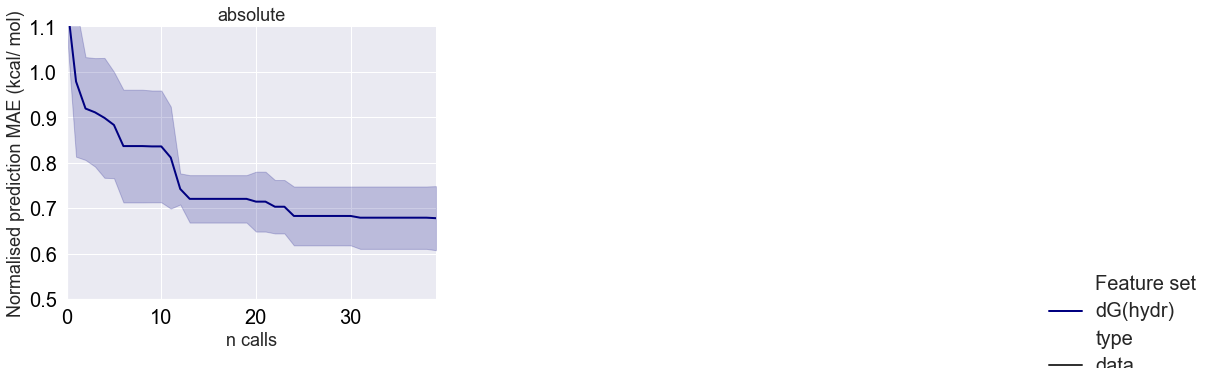

In [5]:
sns.set(
    rc={#'figure.figsize':(10,8),
        "lines.linewidth": 2},
    font_scale=1.5
)

ax = sns.relplot(x="Calls", y="MAE/MAD", 
                 #hue="Dataset",
                 ci="sd", 
                 #row="position",
                 col="Subject",
                 col_wrap=3,
                 hue="Feature set",
                 kind="line",
                 style="type",
                 legend="full",
                 palette=[
                     'navy'], 
#                      'maroon', 
#                      'navy', 
#                      'navy',
#                      'navy', 
#                      'navy', 
#                      'navy',
#                      'navy'],
                 data=df,
                )

leg=ax._legend
leg.set_bbox_to_anchor([0.99, 0.12])



#ax.fig.set_size_inches(46,20)

plt.xlim(0, df["Calls"].max())
plt.ylim(0.5, 1.1)

#ax.fig.tight_layout(h_pad=0.01, w_pad=0.2)


plt.setp(ax._legend.get_title(), fontsize=20)
plt.setp(ax._legend.get_texts(), fontsize=20)  
ax.map(plt.yticks, fontsize=20, color="black")
ax.map(plt.xticks, fontsize=20, color="black")

plt.xticks(fontsize=20)

ax.set_axis_labels("n calls", "Normalised prediction MAE (kcal/ mol)")
ax.set_titles("{col_name}")

plt.savefig("opt_output/convergence_plot_50x40.png")

plt.show()